#Binary SVM
Implement a binary SVM classifier to distinguish between classes 6 and 9 of the MNIST dataset (dataset_1). Evaluate the classifier by calculating the confusion matrix, and from this, calculate accuracy, precision and recall. Try a different number of iterations and changing the kernel. Comment on the results.

In [7]:
import numpy as np

# Load the dataset into memory from the folder dataset_1
x_train = np.load('train_data.npy')
y_train = np.load('train_labels.npy')

x_test = np.load('test_data.npy')
y_test = np.load('test_labels.npy')

y_train[y_train == 6] = 0
y_train[y_train == 9] = 1

y_test[y_test == 6] = 0
y_test[y_test == 9] = 1


11867 2


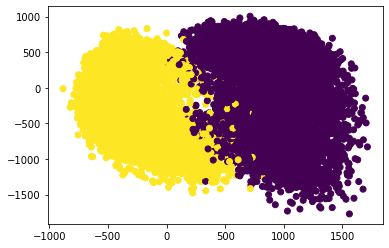

In [8]:
# 2. Short data analysis

# How many objects and features?
nobj = x_train.shape[0]
nfeat = x_train.shape[1]
print(nobj, nfeat)
# Scatterplot of the data
from matplotlib import pyplot as plt
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
plt.show()

In [10]:
from sklearn.svm import SVC

# Initialise parameters
max_iter = 10000
kernel = 'linear'
# Initialise the SVM classification model
model = SVC(kernel=kernel, max_iter=max_iter)
# Train (fit in Sklearn slang) the model
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(kernel='linear', max_iter=10000)

[[571 411]
 [ 18 967]]


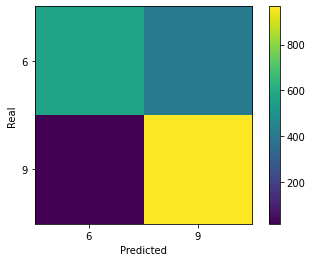

In [12]:
# Classify (make predictions) on the testing set and build the confusion matrix
from sklearn.metrics import confusion_matrix
predicted = model.predict(x_test)
# Calculate confusion matrix using sklearn
cfs = confusion_matrix(y_test,predicted)
# Print and then perform and imshow of the confusion matrix
from matplotlib import pyplot as plt
print(cfs)
plt.imshow(cfs)
plt.colorbar()
plt.xlabel("Predicted")
plt.xticks([0,1],["6","9"])
plt.yticks([0,1],["6","9"])
plt.ylabel("Real")
plt.show()

In [18]:
# Manually calculate accuracy, precision and recall (for both classes 6 and 9) from the confusion matrix
accuracy = np.sum(cfs.diagonal())/np.sum(cfs)
precision_6 = cfs[0,0]/ np.sum(cfs[:,0])
precision_9 = cfs[1,1]/ np.sum(cfs[:,1])
recall_6 = cfs[0,0]/ np.sum(cfs[0,:])
recall_9 = cfs[1,1]/ np.sum(cfs[1,:])
print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Precision w.r.t class 6: ' + "{0:.2f}".format(precision_6))
print('Precision w.r.t class 9: ' + "{0:.2f}".format(precision_9))
print('Recall w.r.t class 6: ' + "{0:.2f}".format(recall_6))
print('Recall w.r.t class 9: ' + "{0:.2f}".format(recall_9))

Classifier accuracy: 78.19%
Precision w.r.t class 6: 0.97
Precision w.r.t class 9: 0.70
Recall w.r.t class 6: 0.58
Recall w.r.t class 9: 0.98


In [19]:
# Use sklearn to calculate the accuracy, precision and recall (of the whole classifier)
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test,predicted)
precision_6 = precision_score(y_test,predicted,pos_label=0)
precision_9 = precision_score(y_test,predicted,pos_label=1)
recall_6 = recall_score(y_test,predicted,pos_label=0)
recall_9 = recall_score(y_test,predicted,pos_label=1)
print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Precision w.r.t class 6: ' + "{0:.2f}".format(precision_6))
print('Precision w.r.t class 9: ' + "{0:.2f}".format(precision_9))
print('Recall w.r.t class 6: ' + "{0:.2f}".format(recall_6))
print('Recall w.r.t class 9: ' + "{0:.2f}".format(recall_9))

Classifier accuracy: 78.19%
Precision w.r.t class 6: 0.97
Precision w.r.t class 9: 0.70
Recall w.r.t class 6: 0.58
Recall w.r.t class 9: 0.98
